In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import pandas as pd

train_set8 = pd.read_pickle("df_train_downsampled_features8_onlylinks.pkl")

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

# Loading some example data
train_x_set8 = train_set8.loc[:, ['tfidf_cosine', 'tfidf_bigram_cosine', 'tfidf_trigram_cosine', 'count_vec_cosine', 'lda_50topics_cosine', 'lda_100topics_cosine', 'lda_200topics_cosine']].values
train_y_set8 = train_set8['label'].values

In [2]:
test_x_set8 = pd.read_pickle("test_x_features8_linksonly.pkl")
test_y_set8 = pd.read_pickle("test_y_features8_linksonly.pkl")
test_x_set8_xgboost = test_x_set8.loc[:, ['tfidf_cosine', 'tfidf_bigram_cosine', 'tfidf_trigram_cosine', 'count_vec_cosine', 'lda_50topics_cosine', 'lda_100topics_cosine', 'lda_200topics_cosine']].values
test_y_set8_xgboost = test_y_set8['label'].values

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
clf1.fit(train_x_set8, train_y_set8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
predictions1 = clf1.predict(test_x_set8)

In [6]:
print('Logistic Regression:')
print('Accuracy:', accuracy_score(test_y_set8, predictions1))
print('F1 score:', f1_score(test_y_set8, predictions1))
print('Recall:', recall_score(test_y_set8, predictions1))
print('Precision:', precision_score(test_y_set8, predictions1))

Logistic Regression:
Accuracy: 0.8247872852785358
F1 score: 0.04010554089709763
Recall: 0.6647230320699709
Precision: 0.020676521265983495


In [7]:
clf2.fit(train_x_set8, train_y_set8)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [8]:
predictions2 = clf2.predict(test_x_set8)

In [9]:
print('Random Forest:')
print('Accuracy:', accuracy_score(test_y_set8, predictions2))
print('F1 score:', f1_score(test_y_set8, predictions2))
print('Recall:', recall_score(test_y_set8, predictions2))
print('Precision:', precision_score(test_y_set8, predictions2))

Random Forest:
Accuracy: 0.8044308877829507
F1 score: 0.03592909148464704
Recall: 0.6618075801749271
Precision: 0.018465793541039617


In [10]:
clf3.fit(train_x_set8, train_y_set8) 

GaussianNB(priors=None)

In [11]:
predictions3 = clf3.predict(test_x_set8)

In [12]:
print('GaussianNB:')
print('Accuracy:', accuracy_score(test_y_set8, predictions3))
print('F1 score:', f1_score(test_y_set8, predictions3))
print('Recall:', recall_score(test_y_set8, predictions3))
print('Precision:', precision_score(test_y_set8, predictions3))

GaussianNB:
Accuracy: 0.8614223791940921
F1 score: 0.04343971631205674
Recall: 0.5714285714285714
Precision: 0.022578044004146987


In [13]:
clf4.fit(train_x_set8, train_y_set8) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
predictions4 = clf4.predict(test_x_set8)

In [15]:
print('SVM:')
print('Accuracy:', accuracy_score(test_y_set8, predictions4))
print('F1 score:', f1_score(test_y_set8, predictions4))
print('Recall:', recall_score(test_y_set8, predictions4))
print('Precision:', precision_score(test_y_set8, predictions4))

SVM:
Accuracy: 0.8375662225076256
F1 score: 0.04294362466893681
Recall: 0.6618075801749271
Precision: 0.02219180760582657


In [16]:
from xgboost import XGBClassifier

/Users/sophiekamuf/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# fit xgboost model no training data
model = XGBClassifier()
model.fit(train_x_set8, train_y_set8)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [18]:
predictions5 = model.predict(test_x_set8_xgboost)

/Users/sophiekamuf/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
print('XGBoost:')
print('Accuracy:', accuracy_score(test_y_set8_xgboost, predictions5))
print('F1 score:', f1_score(test_y_set8_xgboost, predictions5))
print('Recall:', recall_score(test_y_set8_xgboost, predictions5))
print('Precision:', precision_score(test_y_set8_xgboost, predictions5))

XGBoost:
Accuracy: 0.7832236314015091
F1 score: 0.03556888793657596
Recall: 0.7259475218658892
Precision: 0.018231073363596428


In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [22]:
mlp.fit(train_x_set8, train_y_set8)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [23]:
predictions6 = mlp.predict(test_x_set8_xgboost)

In [24]:
print('MLP - multi-layer perceptron:')
print('Accuracy:', accuracy_score(test_y_set8_xgboost, predictions6))
print('F1 score:', f1_score(test_y_set8_xgboost, predictions6))
print('Recall:', recall_score(test_y_set8_xgboost, predictions6))
print('Precision:', precision_score(test_y_set8_xgboost, predictions6))

MLP - multi-layer perceptron:
Accuracy: 0.7791780382083802
F1 score: 0.03521077365504665
Recall: 0.7317784256559767
Precision: 0.01803938479229553


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
width, height = plt.figaspect(1.68)
fig = plt.figure(figsize=(width,height), dpi=2000)

<Figure size 8000x13440 with 0 Axes>

/Users/sophiekamuf/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


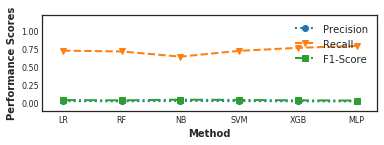

In [10]:
# Marketing channels line plot
ax3 = plt.subplot(2,2,(3,4))
y_series = [1,2,3,4,5,6]
x_1 = [0.01607309590502868, 0.013930523717157467, 0.019151231792843015, 0.017064846416382253, 0.013999118165784832, 0.012550703889286566
]
x_2 = [0.7259036144578314, 0.713855421686747, 0.641566265060241, 0.7228915662650602, 0.7650602409638554, 0.7921686746987951]
#x_3 = [0.031449823828787686, 0.027327760161429807, 0.03719224724986904, 0.0333425951653237, 0.027495128815760987, 0.024709916850660027]
ax3.plot(y_series, x_1, linewidth=2, linestyle=':', marker='o', label='Precision')
ax3.plot(y_series, x_2, linewidth=2, linestyle='--', marker='v', label='Recall')
ax3.plot(y_series, x_3, linewidth=2, linestyle='-.', marker='s', label='F1-Score')
plt.xlabel('Method')
plt.ylabel('Performance Scores')
plt.xticks([1,2,3,4,5,6], ['LR', 'RF', 'NB', 'SVM', 'XGB', 'MLP'])
#ax2.tick_params(axis='x', pad=8)
leg=plt.legend(loc='best', numpoints=1, fancybox=True)

# Axes alteration to put zero values inside the figure Axes
# Avoids axis white lines cutting through zero values - fivethirtyeight style
xmin, xmax, ymin, ymax = ax3.axis()
ax3.axis([xmin-0.1, xmax+0.1, ymin-0.1, ymax+0.4])
#ax3.set_title('Leads by channel', fontstyle='italic')

# Space plots a bit
plt.subplots_adjust(hspace=0.25, wspace=0.40)

fig.suptitle("Seaborn-white style example")
plt.savefig('f8_downsampling_withF1.svg', bbox_inches='tight')